# Assignment 4

## Que 2

Joint Probability Distribution

<h2>$\pi(\mu,\nu|y)	\propto \pi(\mu,\nu)f(y|\mu,\nu)$</h2>

<h2>$\pi(\mu,\nu|y)	\propto \frac{\nu^{a_o-1}e^{b_o\nu}\Gamma(\frac{v+1}{2})}{\sqrt{\nu}\Gamma(\frac{v}{2})(1+\frac{\mu^2}{\nu})^{\frac{v+1}{2}}}\prod_{i=1}^{n} e^{-\frac{(y_i-\mu)^{2}}{2}}$</h2>

MH Algorithm:

Choose a starting calue of y, \nu, \mu

Draw a proposed value \nuv^*\sim Truncated Gamma(a_o, b_o,(2,\infty))$

Then draw $\mu^*\sim t_{\nu}$

Finally draw $y^*\sim N(\mu, 1)$

Calculate <h5>$\alpha = min\{1, \frac{\pi(\mu^*,\nu^*|y)}{\pi(\mu,\nu|y)}\}$</h5>

Draw $U \sim U[0,1]$

If $U < \alpha$ set $y = y^*$, $\mu = \mu^*$ and $\nu = \nu^*$ else run loop again with same y, $\mu$ and $\nu$

Implementation in Julia

1

In [2]:
import Pkg

In [9]:
Pkg.add("Distributions")

   Resolving package versions...
  No Changes to `C:\Users\anura\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\anura\.julia\environments\v1.7\Manifest.toml`


In [10]:
Pkg.add("SpecialFunctions")

   Resolving package versions...
    Updating `C:\Users\anura\.julia\environments\v1.7\Project.toml`
  [276daf66] + SpecialFunctions v2.1.5
  No Changes to `C:\Users\anura\.julia\environments\v1.7\Manifest.toml`


In [11]:
using SpecialFunctions

In [21]:
using Distributions
using Random
using Plots
Random.seed!(42)

TaskLocalRNG()

In [78]:
a0 = 2
b0=0.1
mu1 = 0
nu1 = 30
y1 = 1

1

In [79]:
y = []
push!(y,y1)
for n in 1:10000
    nu2 = rand(Truncated(Gamma(a0, b0), 2, Inf))
    mu2 = rand(TDist(nu1))
    y2 = rand(Normal(mu1, 1))
    alpha = min(1, (nu1^(a0-1)*(exp(b0*nu1))*gamma((nu1+1)/2))*exp((-1*(y1-mu1)^2)/2)/((sqrt(nu1))*gamma(nu1/2)*((1+(mu1^2)/nu1)^((nu1+1)/2))))
    u = rand(Uniform(0,1))
    if(u<alpha)
        push!(y,y2)
        nu1 = nu2
        mu1 = mu2
        y1 = y2
    end
end

In [80]:
y

14-element Vector{Any}:
  1
  0.25758767435908136
  0.4747083207688054
  0.5833260660380729
 -2.022972643286958
 -3.2603412743948823
 -0.6633134391452642
 -0.5624717926799101
  1.1019135700348281
  0.06707454787188633
  0.08112689351454923
 -2.2392454432147355
  2.285197033906096
 -1.724880383519105

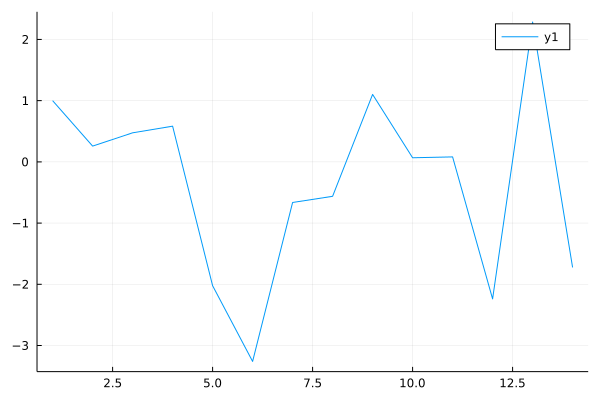

In [81]:
plot(y)